## Libraries 

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

## Data Representation 

In [2]:
df_train = pd.read_csv('customer_churn_dataset-training-master.csv')
df_test  = pd.read_csv('customer_churn_dataset-testing-master.csv') 

In [3]:
df_train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [5]:
df_test.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [ ]:
df_train.

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [9]:
df_train.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


## Data Clean

In [ ]:
# check null values 
df_train.isna().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [12]:
df_train.dropna(inplace=True)

In [ ]:
# check duplicated values 
df_train.duplicated().sum()

0

In [17]:
# drop unneeded columns 
df_train.drop(columns='CustomerID' , inplace=True)
df_test.drop(columns='CustomerID' , inplace=True)

ValueError: List of boxplot statistics and `positions` values must have same the length

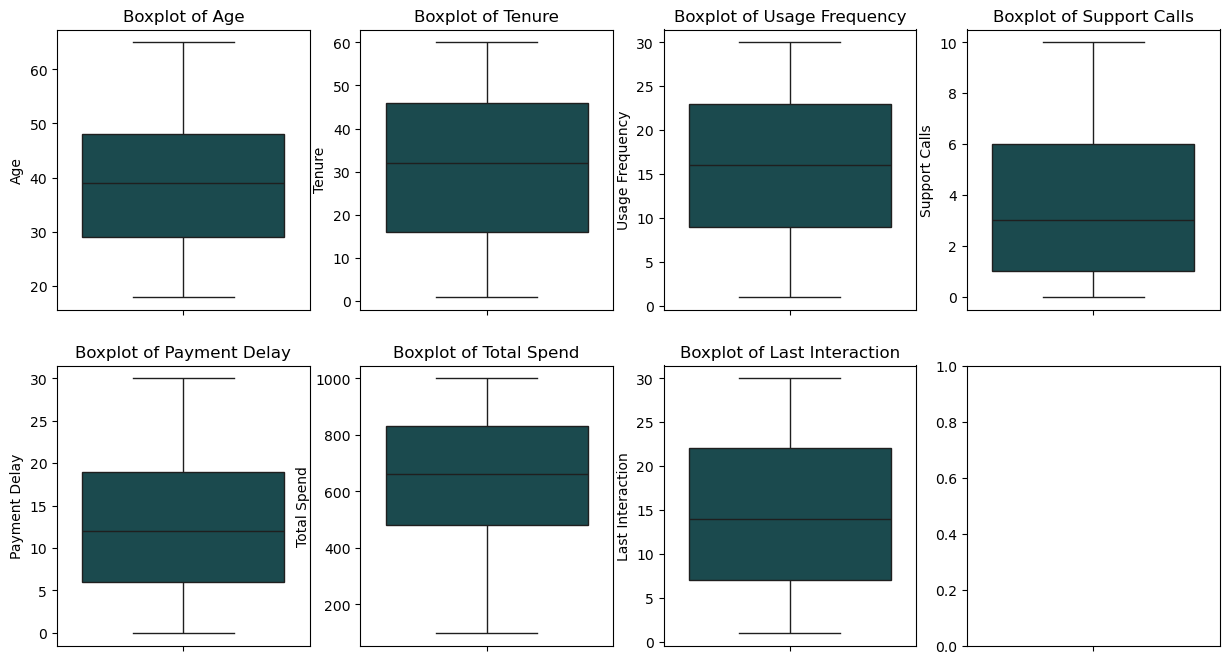

In [94]:
# check outliers 
numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, (len(numeric_cols)+1)//2, i)
    sns.boxplot(y=df_train[col], color="#125157") 
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

##  Exploratory Data Analysis (EDA)

In [19]:
df_train.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


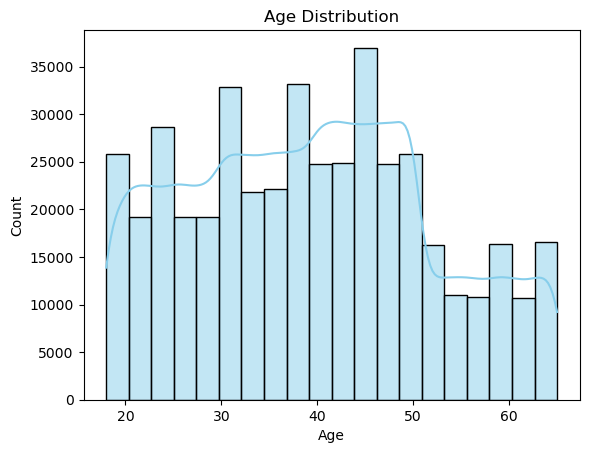

In [20]:
sns.histplot(df_train['Age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


C:\Users\elmnshawy\AppData\Local\Temp\ipykernel_8028\3869870502.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Age', data=df_train , palette={'0': "#81D5DD", '1': "#0A455C"})


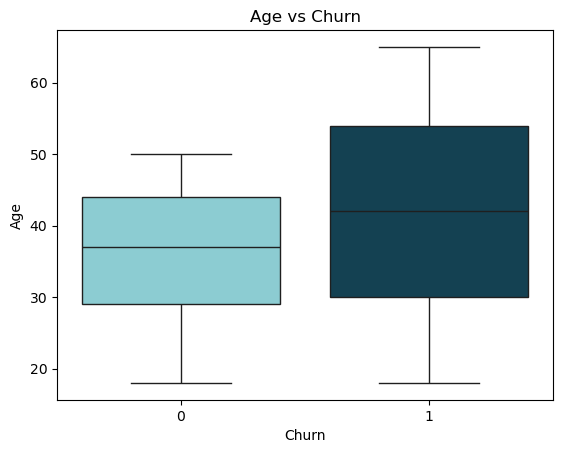

In [82]:
sns.boxplot(x='Churn', y='Age', data=df_train , palette={'0': "#81D5DD", '1': "#0A455C"})
plt.title("Age vs Churn")
plt.show()

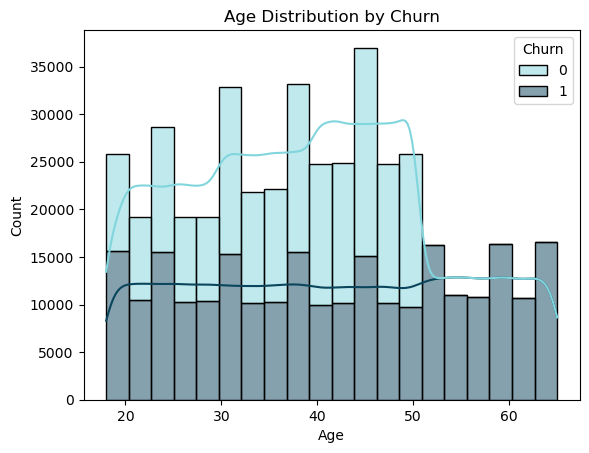

In [83]:

sns.histplot(data=df_train, x='Age', hue='Churn', bins=20, kde=True, multiple='stack',
             palette={0: "#81D5DD", 1: "#0A455C"})
plt.title("Age Distribution by Churn")
plt.show()

In [80]:
df_train['Churn'] = pd.to_numeric(df_train['Churn'], errors='raise').astype(int)

In [26]:
print(df_train['Gender'].value_counts())

Gender
Male      250252
Female    190580
Name: count, dtype: int64


C:\Users\elmnshawy\AppData\Local\Temp\ipykernel_8028\649175689.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df_train, palette={'Female': "#81D5DD", 'Male': "#0A455C"})


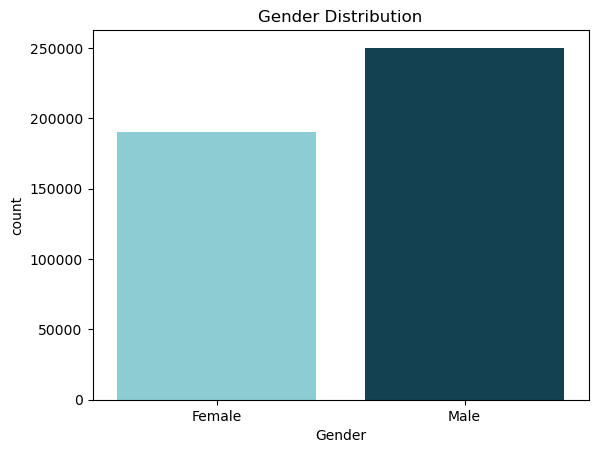

In [86]:
sns.countplot(x='Gender', data=df_train, palette={'Female': "#81D5DD", 'Male': "#0A455C"})
plt.title("Gender Distribution")
plt.show()

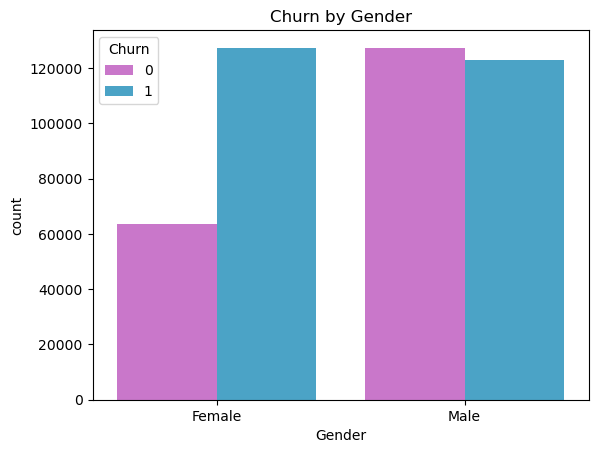

In [88]:
sns.countplot(x='Gender', hue='Churn', data=df_train, palette={0: "#D669D8", 1: "#37ACDA"})
plt.title("Churn by Gender")
plt.show()

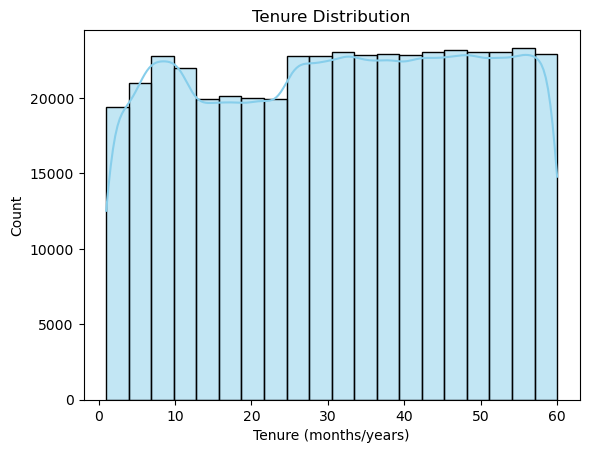

In [31]:
sns.histplot(df_train['Tenure'], bins=20, kde=True, color="skyblue")
plt.title("Tenure Distribution")
plt.xlabel("Tenure (months/years)")
plt.ylabel("Count")
plt.show()

C:\Users\elmnshawy\AppData\Local\Temp\ipykernel_8028\3452477727.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Tenure', data=df_train,  ax=axes[0] , palette={'0': "#81D5DD", '1': "#0A455C"})


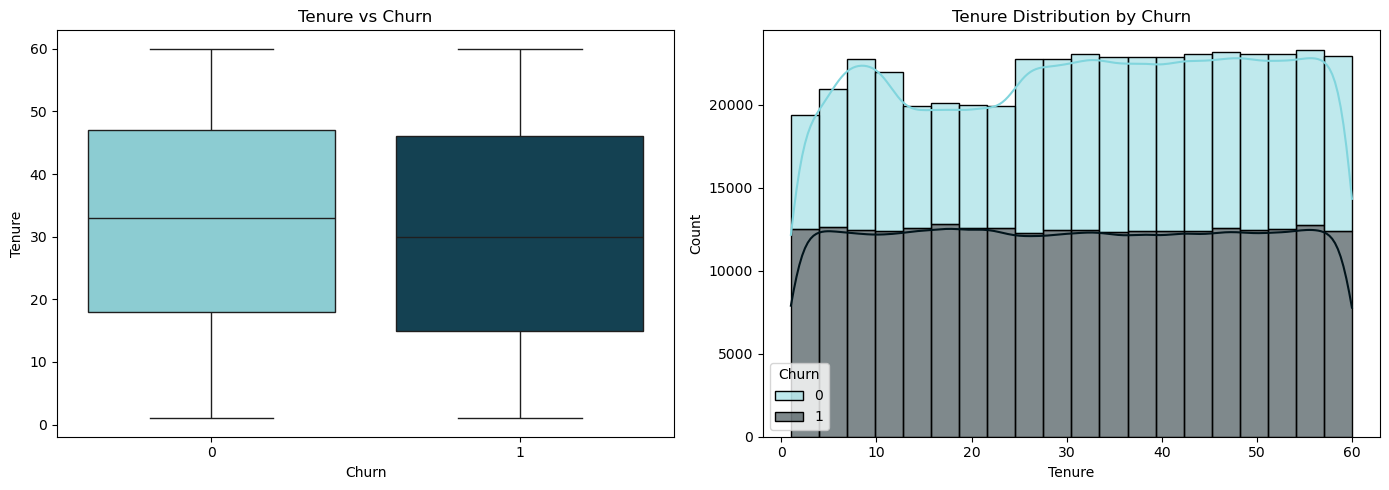

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

sns.boxplot(x='Churn', y='Tenure', data=df_train,  ax=axes[0] , palette={'0': "#81D5DD", '1': "#0A455C"})
axes[0].set_title("Tenure vs Churn")

sns.histplot(data=df_train, x='Tenure', hue='Churn', bins=20, kde=True, multiple='stack', ax=axes[1] , palette={0: "#81D5DD", 1: "#01141B"})
axes[1].set_title("Tenure Distribution by Churn")

plt.tight_layout()
plt.show()

In [34]:
df_train.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [43]:
df_train['Churn'] = df_train['Churn'].astype(int)

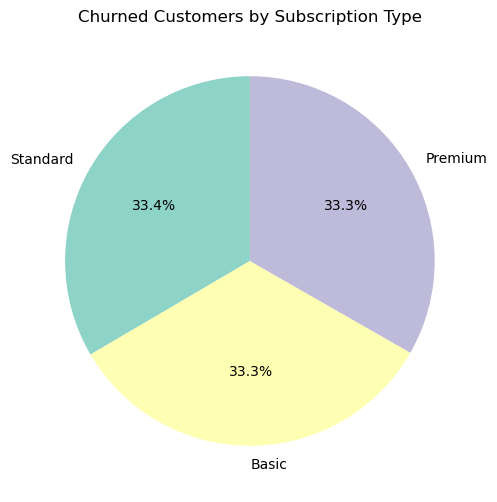

In [53]:
plt.figure(figsize=(6,6))
df_train[df_train['Churn']==1]['Subscription Type'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title("Churned Customers by Subscription Type")
plt.ylabel("")
plt.show()

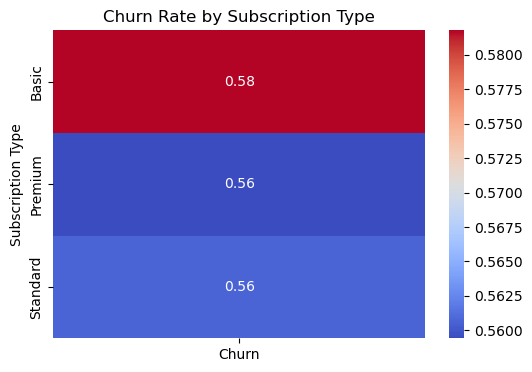

In [52]:
subscription_churn_rate = df_train.groupby("Subscription Type")["Churn"].mean().reset_index()
plt.figure(figsize=(6,4))
sns.heatmap(subscription_churn_rate.pivot_table(values="Churn", index="Subscription Type"), 
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Churn Rate by Subscription Type")
plt.show()


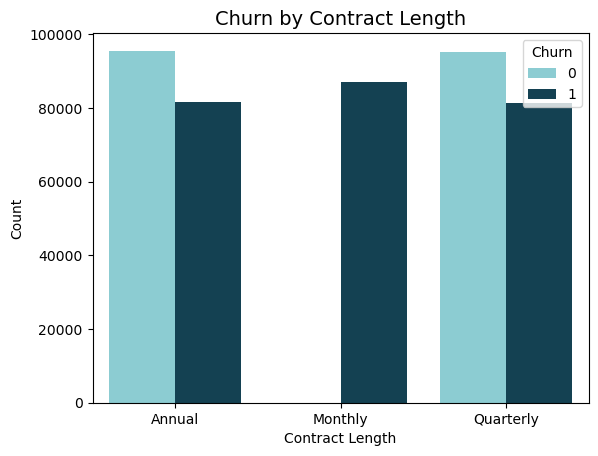

In [76]:
sns.countplot(x='Contract Length', hue='Churn', data=df_train, palette={0: "#81D5DD", 1: "#0A455C"})
plt.title("Churn by Contract Length", fontsize=14)
plt.xlabel("Contract Length")
plt.ylabel("Count")
plt.show()

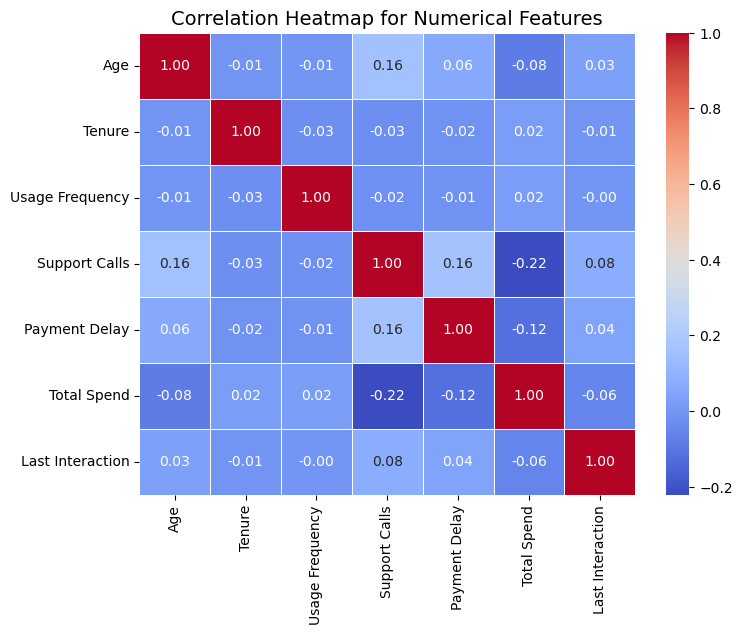

In [56]:
numeric_df = df_train.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Features", fontsize=14)
plt.show()

C:\Users\elmnshawy\AppData\Local\Temp\ipykernel_8028\2322559378.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_train, palette='Set2')


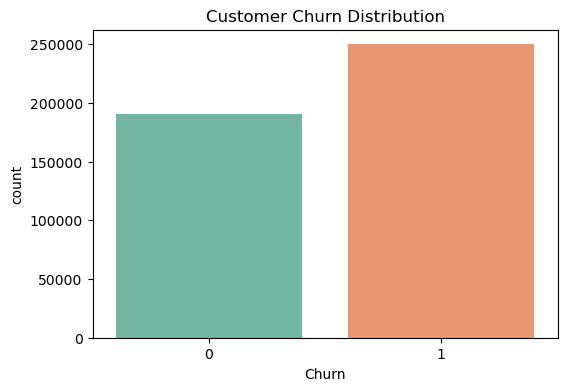

In [60]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df_train, palette='Set2')
plt.title("Customer Churn Distribution")
plt.show()

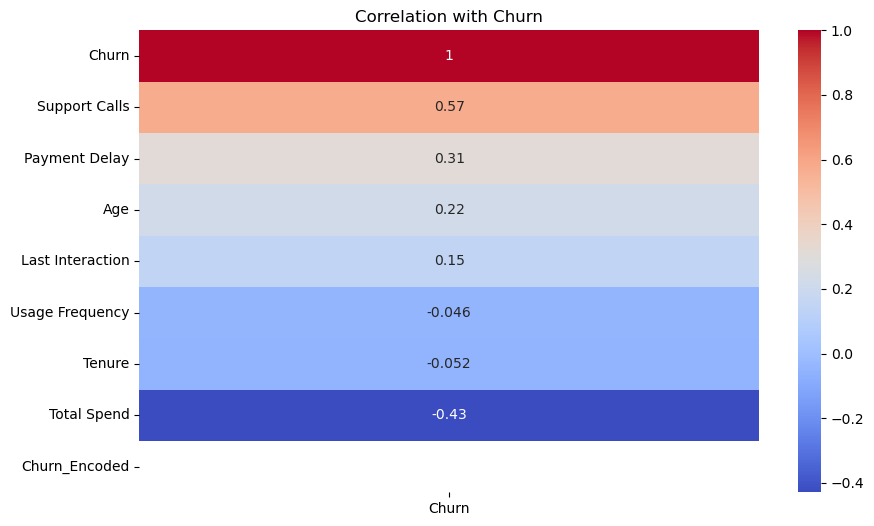

In [ ]:
corr = df_train.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Churn")
plt.show()
